In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


In [3]:
# for c in df.columns:
#     print(f'Column {c}: {df[c].unique()}\nData Type: {df[c].dtypes}\n')

In [4]:
df.fillna(np.nan, inplace=True)
df.replace({
    'No Info': np.nan,
    'None': np.nan,
    'none': np.nan
}, inplace=True)
df["Local or global player"].replace({"GLObaL": "Global", "global": "Global", "GLOBAL": "Global",
                                      "LOCAL": "Local", "local  ": "Local", "local": "Local"}, inplace=True)
df["Cloud or platform based serive/product?"].replace({"cloud":"Cloud"}, inplace=True)
df.rename(columns={
    'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive'
                   :"Capital intensive business", 
    'Online or offline venture - physical location based business or online venture?': 'Online or offline venture'},inplace=True)

In [5]:
succ = len(df[df['Dependent-Company Status'] == 'Success'])
fail = len(df[df['Dependent-Company Status'] == 'Failed'])
total = len(df)
print(f'The percentage of successful companies is {succ / total * 100:0.2f}%')
print(f'The percentage of failed companies is {fail / total * 100:0.2f}%')

The percentage of successful companies is 64.62%
The percentage of failed companies is 35.38%


In [6]:
def plot_info(x, hue=df["Dependent-Company Status"], width=14, height=8, fontsize=13, rotation=30):
    plt.figure(figsize=(width, height))
    ax = sns.countplot(x, hue=hue)
    plt.xticks(rotation=rotation)
    for i in ax.patches:
        ax.text(i.get_x(), i.get_height(), str(round(i.get_height())), fontsize=fontsize)
    plt.show();
    

def subplot_info(m, n, cols, hue=df["Dependent-Company Status"], width=15, height=15):
    plt.figure(figsize=(width, height))
    for i, col in enumerate(cols, start=1):
        plt.subplot(m, n, i)
        ax = sns.countplot(df[col].dropna(), hue=hue)
        plt.xlabel(col)
        for i in ax.patches:
            ax.text(i.get_x(), i.get_height(), str(round(i.get_height())), fontsize=12)
    plt.show();

# We will explore some features that can affect the status of the company

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


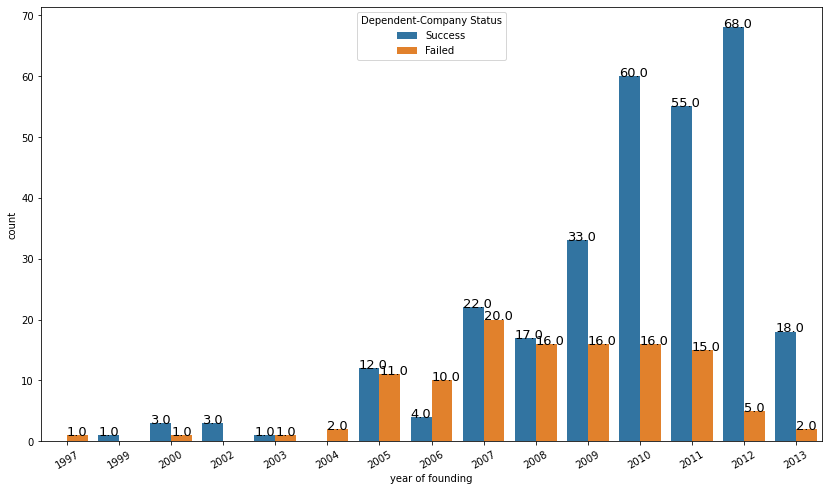

In [7]:
plot_info(df["year of founding"].dropna().astype(int))

* The highest number of companies were founded in the year 2010, 2012, and 2011.
* An average number of companies were founded in the years 2009, 2007, 2005, 2008, 2013.
* The highest success rate of companies is in the year 2012, 2010, and year 2011.
* The highest failure rate of companies is in the years 2006, 2005 and year 2007.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


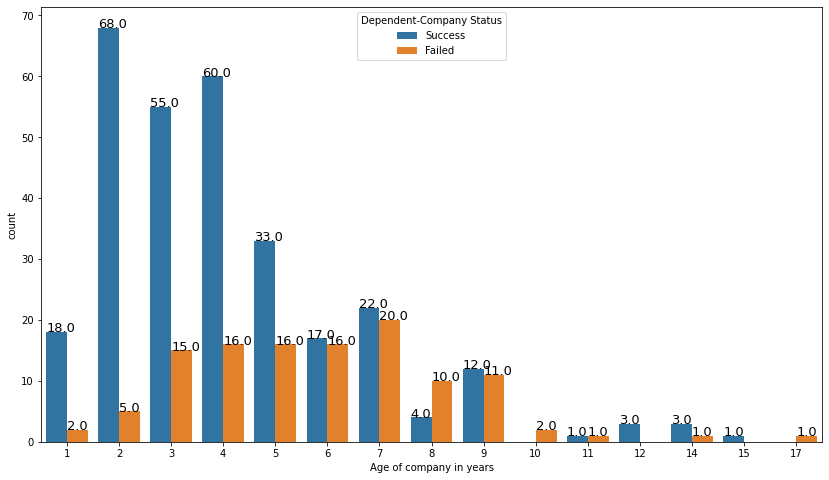

In [8]:
plot_info(df["Age of company in years"].dropna().astype(int), rotation=None)

* The companies which have age less than 5 years are more successful.

In [9]:
countries = df['Country of company'].dropna().unique()
for country in countries:
    x = df[df['Country of company'] == country]
    try:
        succ, fail = x['Dependent-Company Status'].value_counts()
        print('*' * 40)
        print(f'Country: {country}')
        print(f'Number of companies in this country: {len(x)}')
        print(f'Successed: {(succ / (succ + fail) * 100):0.2f}%')
        print(f'Failed: {(fail / (succ + fail) * 100):0.2f}%')
    except:
        pass

****************************************
Country: United States
Number of companies in this country: 305
Successed: 66.56%
Failed: 33.44%
****************************************
Country: India
Number of companies in this country: 10
Successed: 90.00%
Failed: 10.00%
****************************************
Country: Spain
Number of companies in this country: 5
Successed: 80.00%
Failed: 20.00%
****************************************
Country: France
Number of companies in this country: 8
Successed: 75.00%
Failed: 25.00%
****************************************
Country: United Kingdom
Number of companies in this country: 33
Successed: 93.94%
Failed: 6.06%
****************************************
Country: Canada
Number of companies in this country: 3
Successed: 66.67%
Failed: 33.33%
****************************************
Country: Denmark
Number of companies in this country: 3
Successed: 66.67%
Failed: 33.33%
****************************************
Country: Israel
Number of companies in 

* Most companies founded in the USA. 
* Uk's success rate is the highest(93,94%).

## Exploring data and analytic businesses

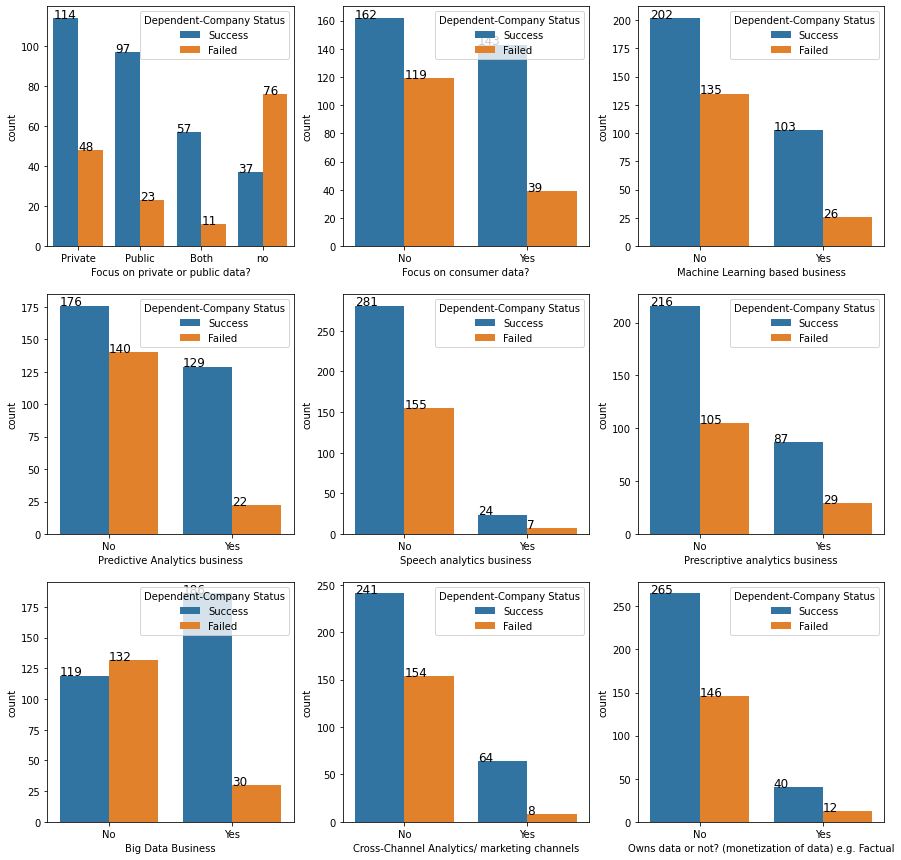

In [10]:
data_analytic = [
    'Focus on private or public data?',
    'Focus on consumer data?',
    'Machine Learning based business',
    'Predictive Analytics business',
    'Speech analytics business',
    'Prescriptive analytics business',
    'Big Data Business',
    'Cross-Channel Analytics/ marketing channels',
    'Owns data or not? (monetization of data) e.g. Factual'
]
subplot_info(m=3, n=3, cols=data_analytic)

* Companies that work with big data are more successful.
* If a company focuses on consumer data, it's probably will be successful.
* Generally, companies that specify in analytics are more successful.

## Exploring status dependence from different business types

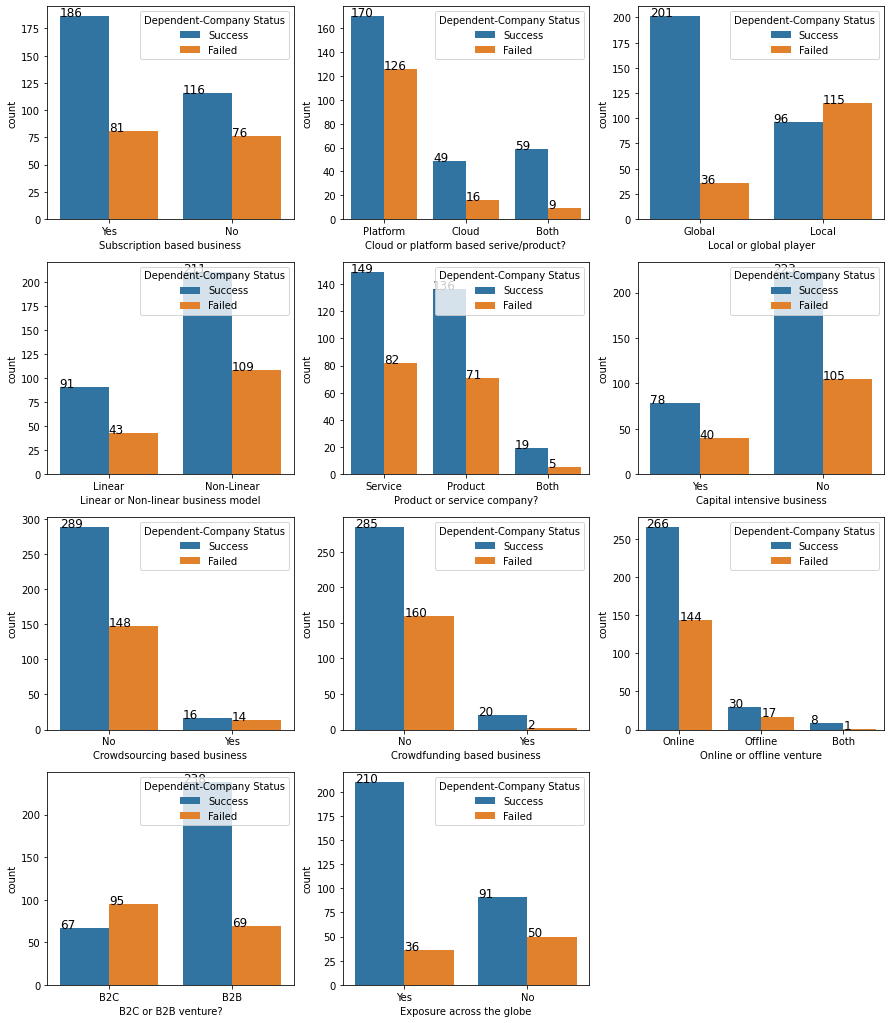

In [11]:
business_type = [
    'Subscription based business',
    'Cloud or platform based serive/product?',
    'Local or global player',
    'Linear or Non-linear business model',
    'Product or service company?',
    'Capital intensive business',
    'Crowdsourcing based business',
    'Crowdfunding based business',
    'Online or offline venture',
    'B2C or B2B venture?',
    'Exposure across the globe'
]
subplot_info(m=4, n=3, cols=business_type, height=18)

* Companies working globally are more successful.
* A lot of companies are platform-based.
* Subscription based companies are more successful.
* Companies with a non-linear approach to work are more successful.
* Online ventures are more successful.
* Business to business(B2B) ventures are more successful.
* Both services and product service companies are essential.

## Education and Experince

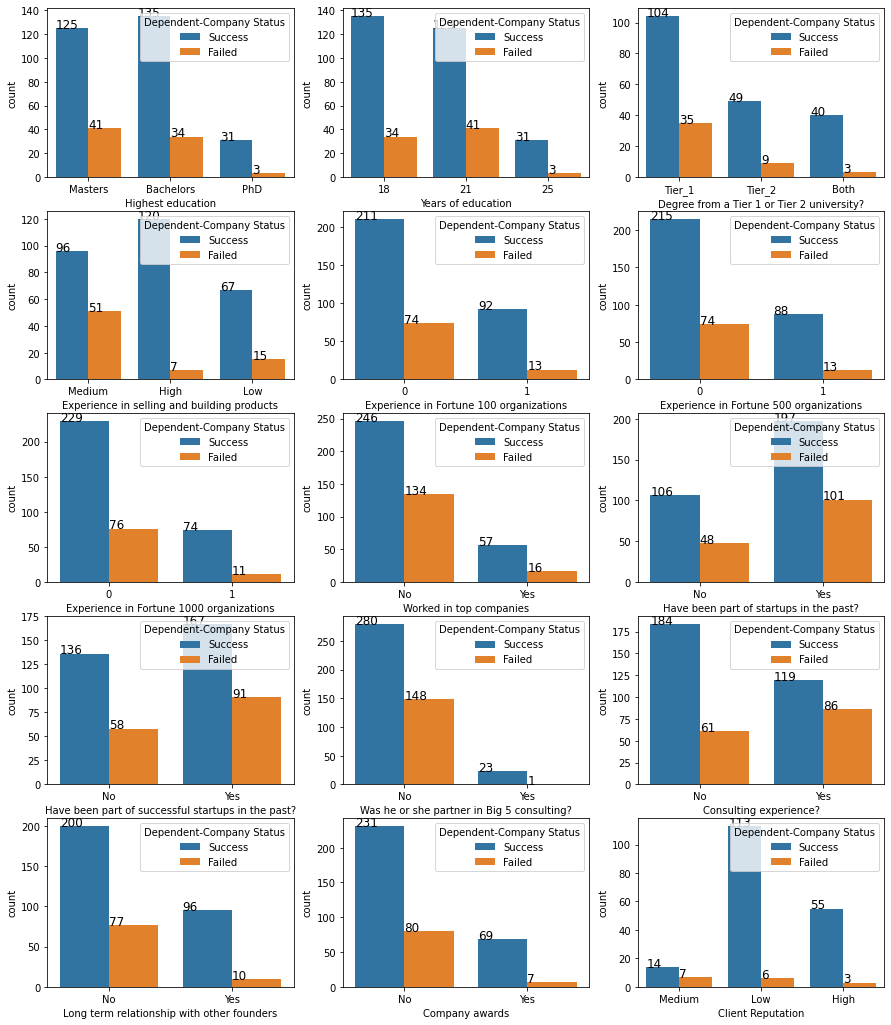

In [12]:
edu_exp = [
    'Highest education',
    'Years of education',
    'Degree from a Tier 1 or Tier 2 university?',
    'Experience in selling and building products',
    'Experience in Fortune 100 organizations',
    'Experience in Fortune 500 organizations',
    'Experience in Fortune 1000 organizations',
    'Worked in top companies',
    'Have been part of startups in the past?',
    'Have been part of successful startups in the past?',
    'Was he or she partner in Big 5 consulting?',
    'Consulting experience?',
    'Long term relationship with other founders',
    'Company awards',
    'Client Reputation'
]
subplot_info(m=5, n=3, cols=edu_exp, height=18)

* Founders who own a bachelor's degree are more successful than those who own Ph.D. or Masters's degree.
* Experience in selling and building products is important in founding a successful company.
* Fortune organization does not affect the status of the company.
* Founders who worked in startups or top companies in the past are more successful.
* Awards of company and client reputation also do not affect status.

## Working with continuous data

In [13]:
cols = [
    'Skills score', 'Percent_skill_Entrepreneurship', 'Percent_skill_Operations',
    'Percent_skill_Engineering', 'Percent_skill_Marketing', 'Percent_skill_Leadership',
    'Percent_skill_Data Science', 'Percent_skill_Business Strategy', 'Percent_skill_Product Management',
    'Percent_skill_Sales', 'Percent_skill_Domain', 'Percent_skill_Law', 'Percent_skill_Consulting',
    'Percent_skill_Finance', 'Percent_skill_Investment'
]
skills = df[cols].astype(float)
skills = pd.concat([skills, df['Dependent-Company Status']], axis=1)
skills.isnull().sum()

Skills score                        81
Percent_skill_Entrepreneurship      61
Percent_skill_Operations            61
Percent_skill_Engineering           61
Percent_skill_Marketing             61
Percent_skill_Leadership            61
Percent_skill_Data Science          61
Percent_skill_Business Strategy     61
Percent_skill_Product Management    61
Percent_skill_Sales                 61
Percent_skill_Domain                61
Percent_skill_Law                   61
Percent_skill_Consulting            61
Percent_skill_Finance               61
Percent_skill_Investment            61
Dependent-Company Status             0
dtype: int64

In [14]:
# We will fill empty values with their mean values
succ = skills[skills['Dependent-Company Status'] == 'Success']
fail = skills[skills['Dependent-Company Status'] == 'Fail']
for c in cols:
    mean1 = np.mean(succ[c])
    mean2 = np.mean(fail[c])
    succ.fillna(mean1, inplace=True)
    fail.fillna(mean2, inplace=True)
skills = pd.concat([succ, fail], axis=0)
skills.isnull().sum()

C:\Users\sergo\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Skills score                        0
Percent_skill_Entrepreneurship      0
Percent_skill_Operations            0
Percent_skill_Engineering           0
Percent_skill_Marketing             0
Percent_skill_Leadership            0
Percent_skill_Data Science          0
Percent_skill_Business Strategy     0
Percent_skill_Product Management    0
Percent_skill_Sales                 0
Percent_skill_Domain                0
Percent_skill_Law                   0
Percent_skill_Consulting            0
Percent_skill_Finance               0
Percent_skill_Investment            0
Dependent-Company Status            0
dtype: int64

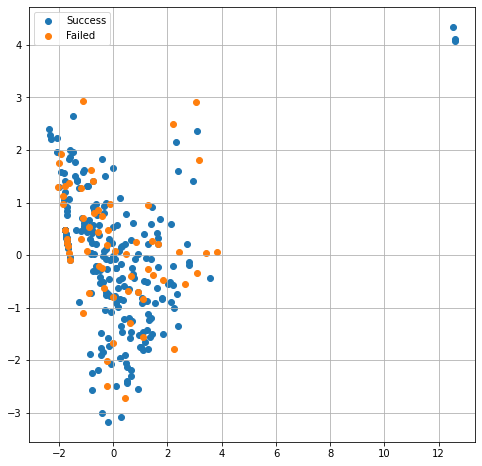

In [15]:
X = StandardScaler().fit_transform(skills.iloc[:, :-1])
pca = PCA(n_components=2)
pca_x = pca.fit_transform(X)
p = pd.DataFrame(pca_x, columns=["PC1", 'PC2'])
skill = pd.concat([p, df['Dependent-Company Status']], axis=1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
targets = ['Success', 'Failed']
for t in targets:
    f = skill['Dependent-Company Status'] == t
    ax.scatter(skill.loc[f, 'PC1'], skill.loc[f, 'PC2'])
ax.legend(targets)
ax.grid();

In [16]:
print('Variance of each component:', pca.explained_variance_ratio_)
print(f'Total Variance Explained: {sum(pca.explained_variance_ratio_) * 100:0.2f}%')

Variance of each component: [0.22622846 0.10009321]
Total Variance Explained: 32.63%


**Principal Component Analysis(PCA), is a way to reduce the number of variables while maintaining the majority of the important information. It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as principal components. The main objective of PCA is to simplify features into fewer components to help visualize patterns in data and to help model run faster.**
**We use Explained Variance Ratio as a metric to evaluate the usefulness of principal components and to choose how many components to use in the model. Ideally, we would choose the number of components to include in the model by adding the explained variance ratio of each component until we reach a total of around 0.8 to avoid overfitting.**
## We can see that our components do not explain the majority of the variance in this dataset (32,63%)!